<a href="https://colab.research.google.com/github/IMI1998/Audio-Processing-using-Machine-Learning/blob/main/Audio_Processing_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install librosa

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ipd.Audio('/content/file_example_WAV_2MG.wav')

In [4]:
music , sr = librosa.load('/content/file_example_WAV_2MG.wav')

In [5]:
print("Shape of the audio file: ",music.shape)
print("Sample Rate of the audio file: ",sr)

Shape of the audio file:  (739329,)
Sample Rate of the audio file:  22050


In [6]:
sample_duration = 1 / sr
print(f"Duration of one sample is {sample_duration:6f} seconds")

Duration of one sample is 0.000045 seconds


In [7]:
tot_samples = len(music)
tot_samples

739329

In [8]:
duration = 1 / sr * tot_samples
print(f"Duration of whole audio is {duration} seconds")

Duration of whole audio is 33.52965986394558 seconds


Text(0.5, 1.0, 'Sample music')

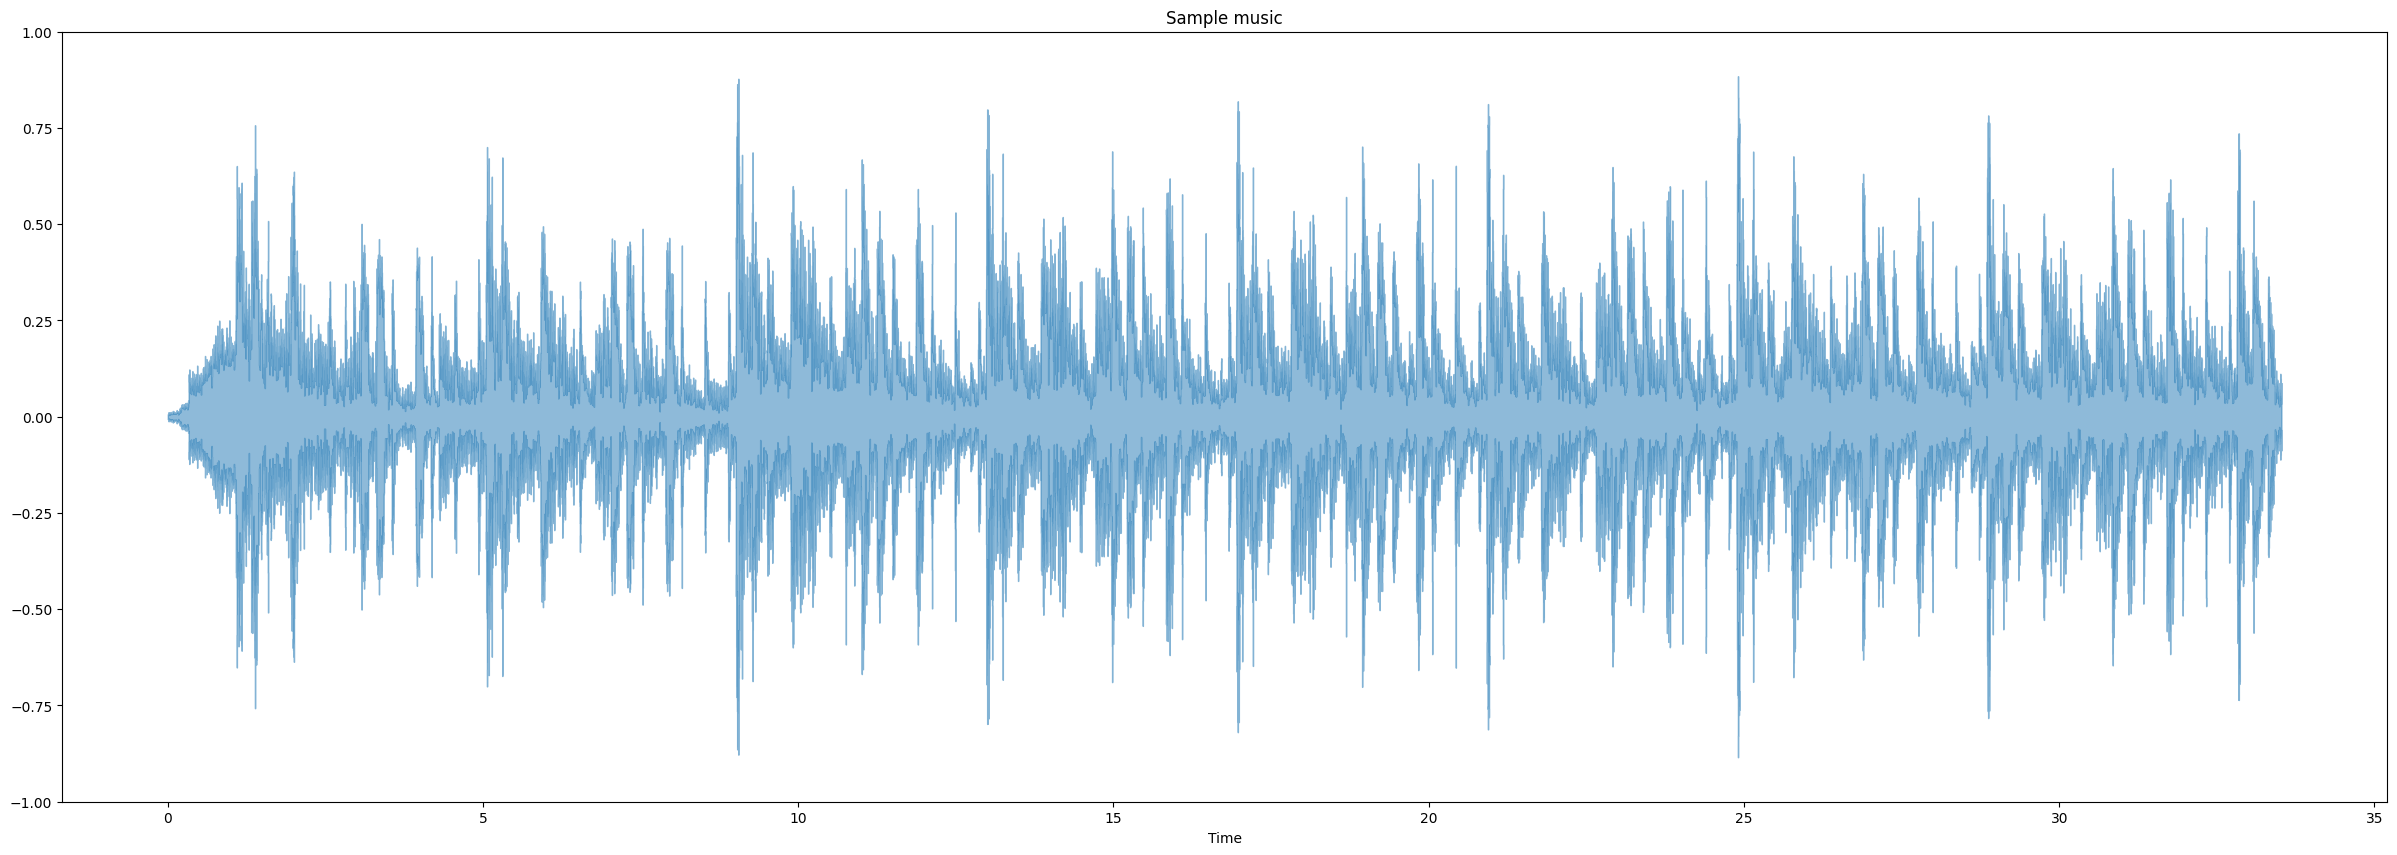

In [12]:
plt.figure(figsize=(30, 10))

librosa.display.waveshow(music, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Sample music")

In [13]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []

    for i in range(0, len(signal), hop_length):
        amplitude_envelope_current_frame = max(signal[i:i+frame_size])
        amplitude_envelope.append(amplitude_envelope_current_frame)

    return np.array(amplitude_envelope)

In [14]:
AE_music = amplitude_envelope(music, FRAME_SIZE, HOP_LENGTH)

In [15]:
print("The total number of frames produced : ",len(AE_music))

The total number of frames produced :  1445


Text(0.5, 1.0, 'Sample music')

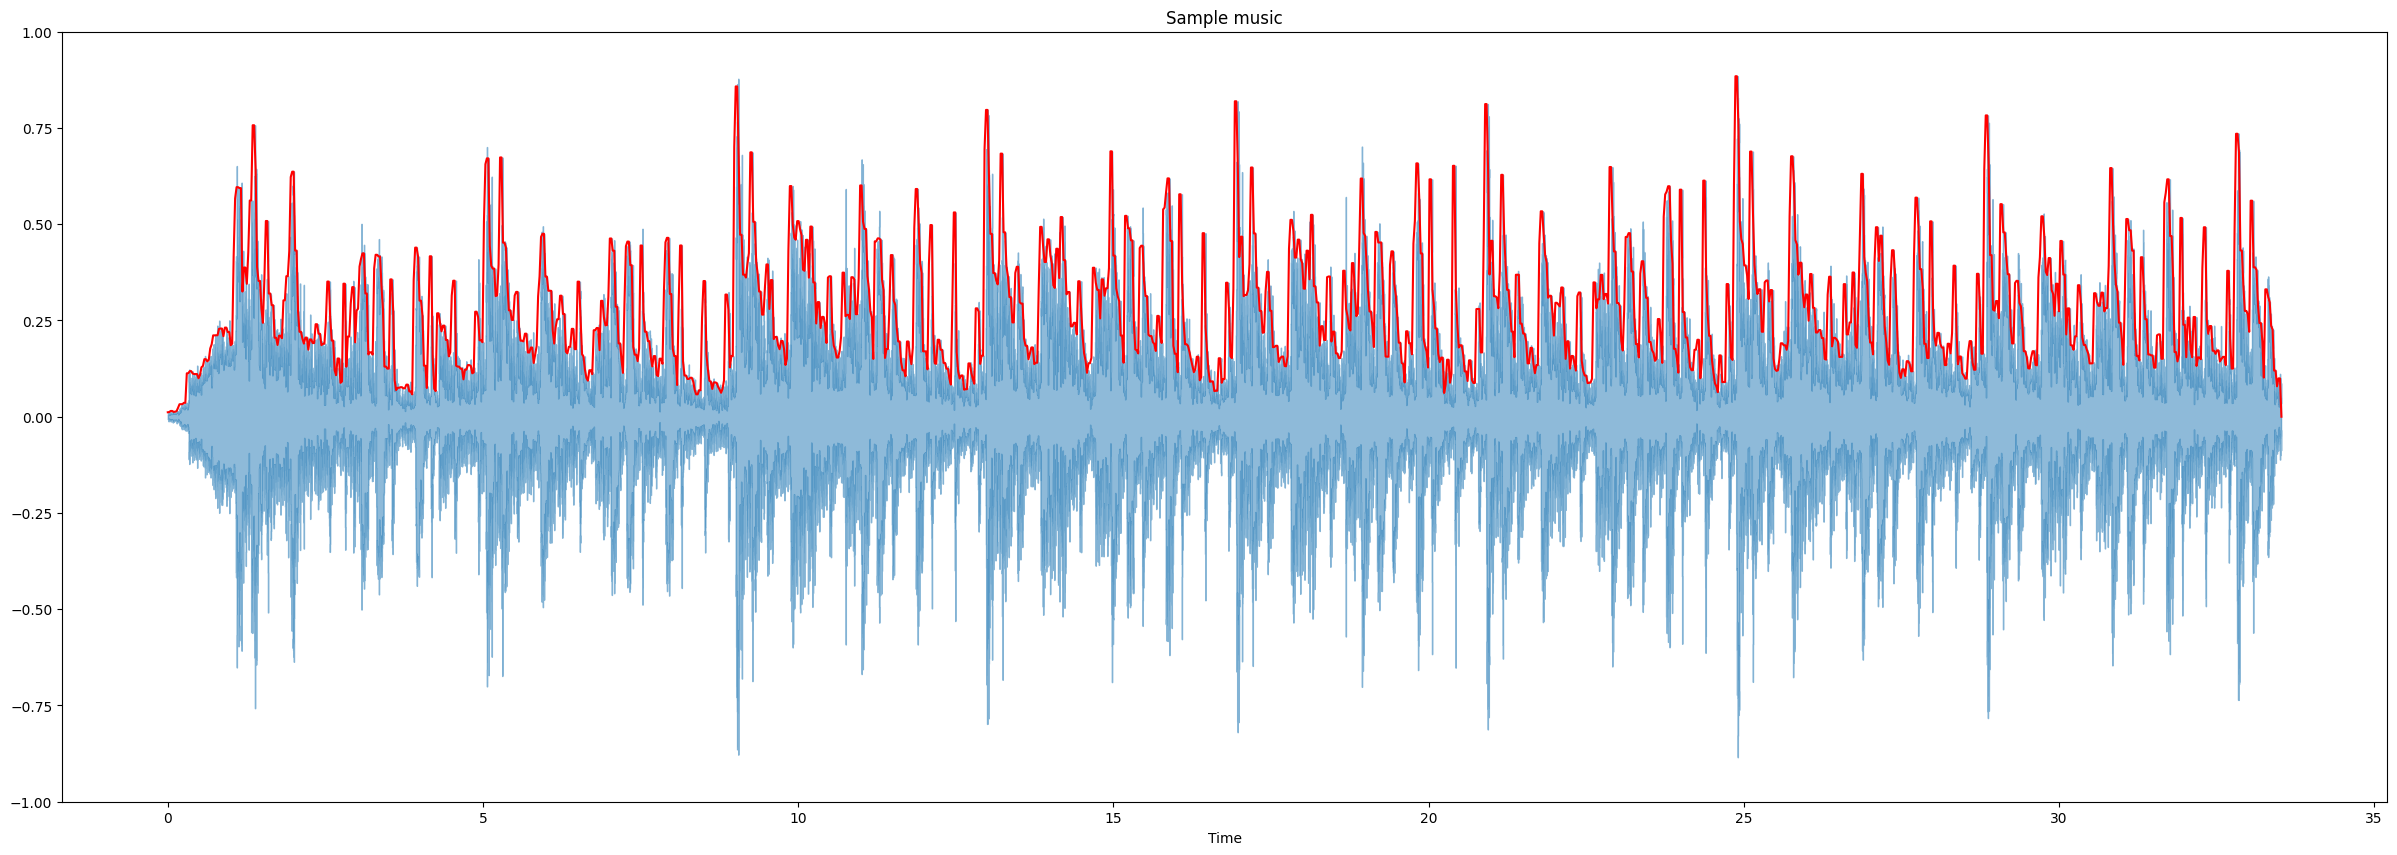

In [16]:
frames = range(len(AE_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(30, 10))

librosa.display.waveshow(music, alpha=0.5)
plt.plot(t, AE_music, color="r")
plt.ylim((-1, 1))
plt.title("Sample music")

In [17]:
ZCR_music = librosa.feature.zero_crossing_rate(music, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [18]:
frames = range(len(ZCR_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

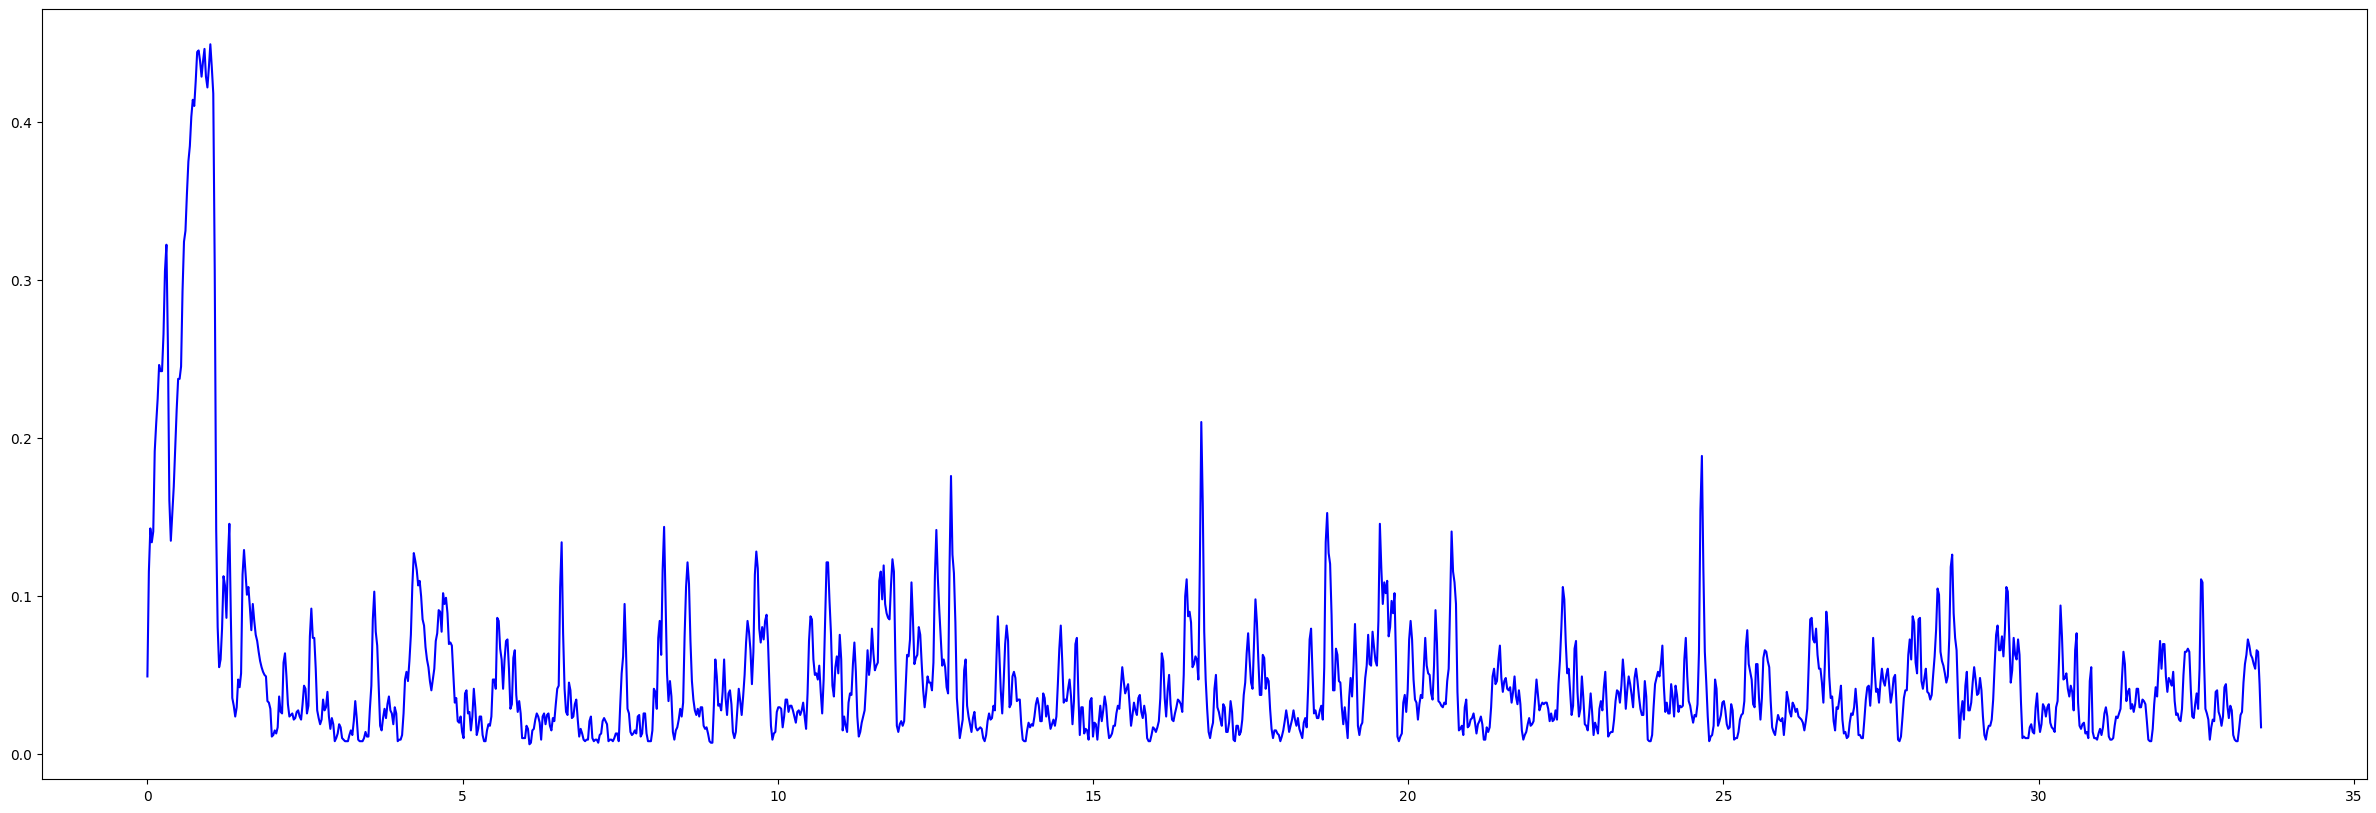

In [19]:
plt.figure(figsize=(30, 10))

plt.plot(t, ZCR_music, color="b")

In [31]:
fft_music = np.fft.fft(music)
len(fft_music)

739329

In [32]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    fft_music = np.fft.fft(signal)
    fft_abs = np.absolute(fft_music)

    plt.figure(figsize=(18, 5))

    f = np.linspace(0, sr, len(fft_abs))
    f_bins = int(len(fft_abs)*f_ratio)

    plt.plot(f[:f_bins], fft_abs[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

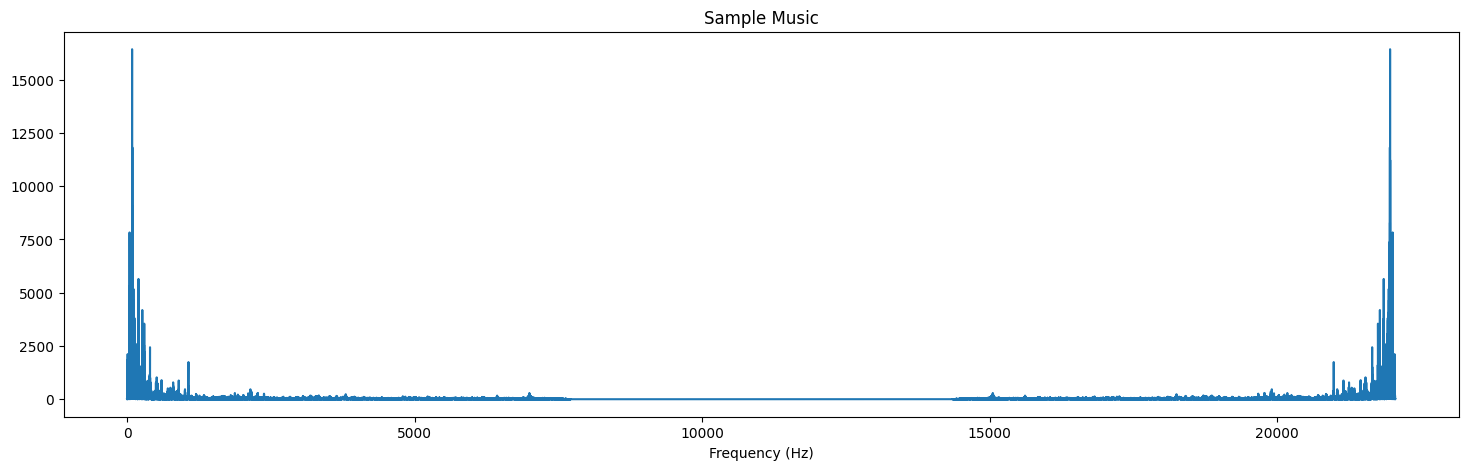

In [33]:
plot_magnitude_spectrum(music, sr, "Sample Music", 1)

In [34]:
FRAME_SIZE = 2048
HOP_SIZE = 512

ssft = librosa.stft(music, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [35]:
type(ssft[0][0])

numpy.complex64

In [36]:
ssft_abs = np.abs(ssft) ** 2
type(ssft_abs[0][0])

numpy.float32

In [37]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

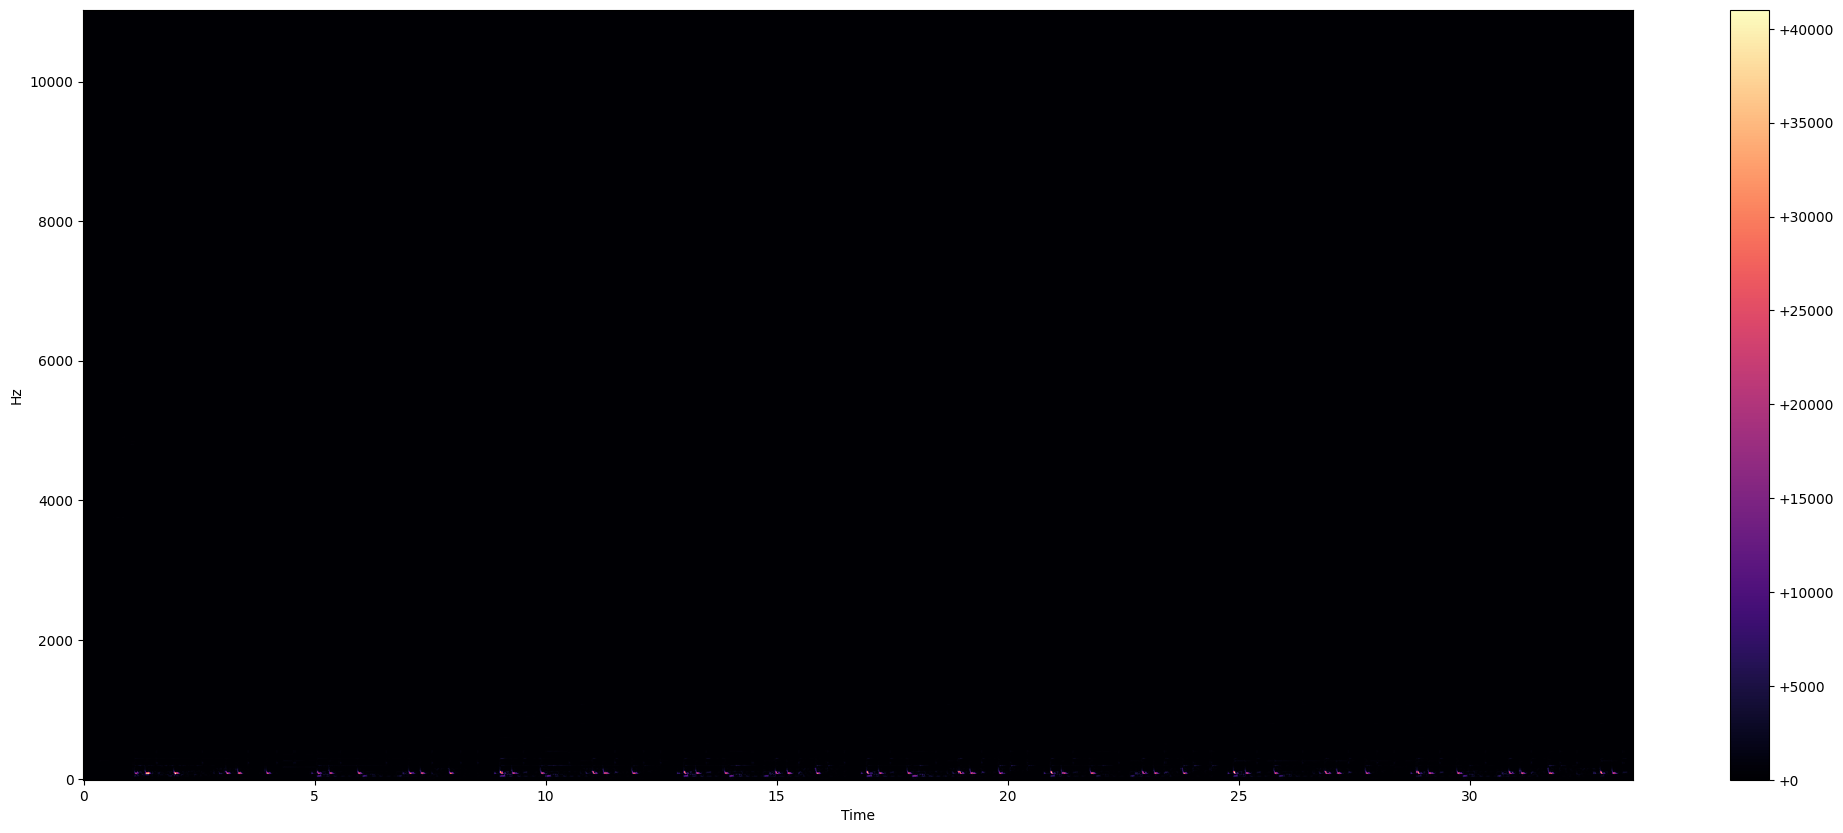

In [38]:
plot_spectrogram(ssft_abs, sr, HOP_SIZE)

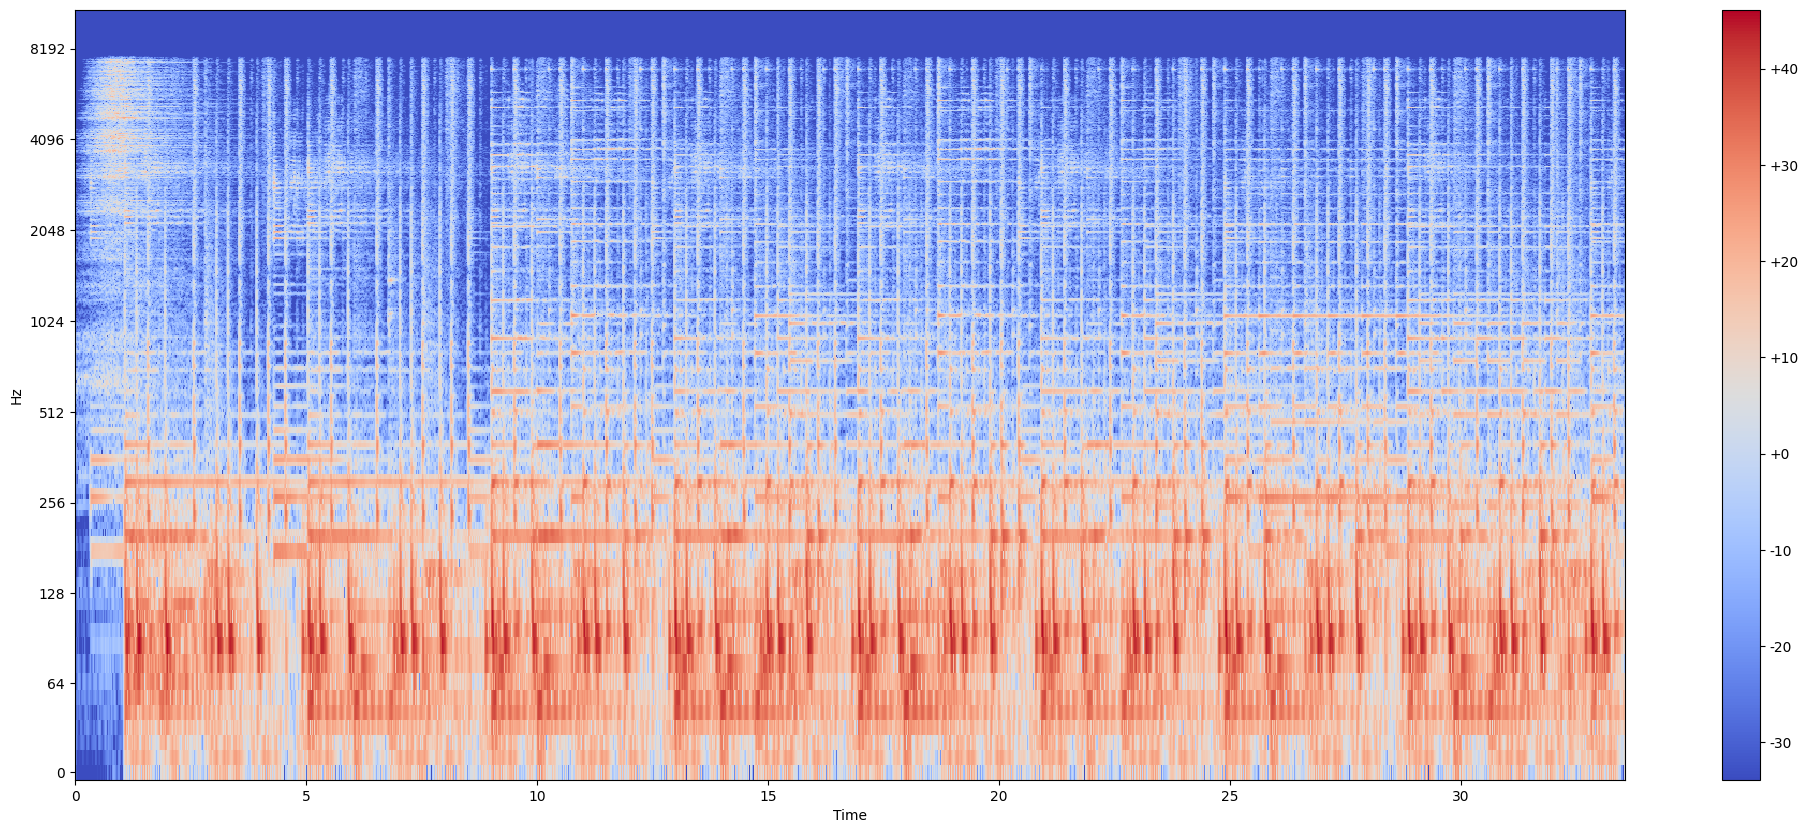

In [40]:
sfft_abs_log = librosa.power_to_db(ssft_abs)
plot_spectrogram(sfft_abs_log, sr, HOP_SIZE,y_axis='log')

In [41]:
mfccs = librosa.feature.mfcc(y=music, n_mfcc=13, sr=sr)
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

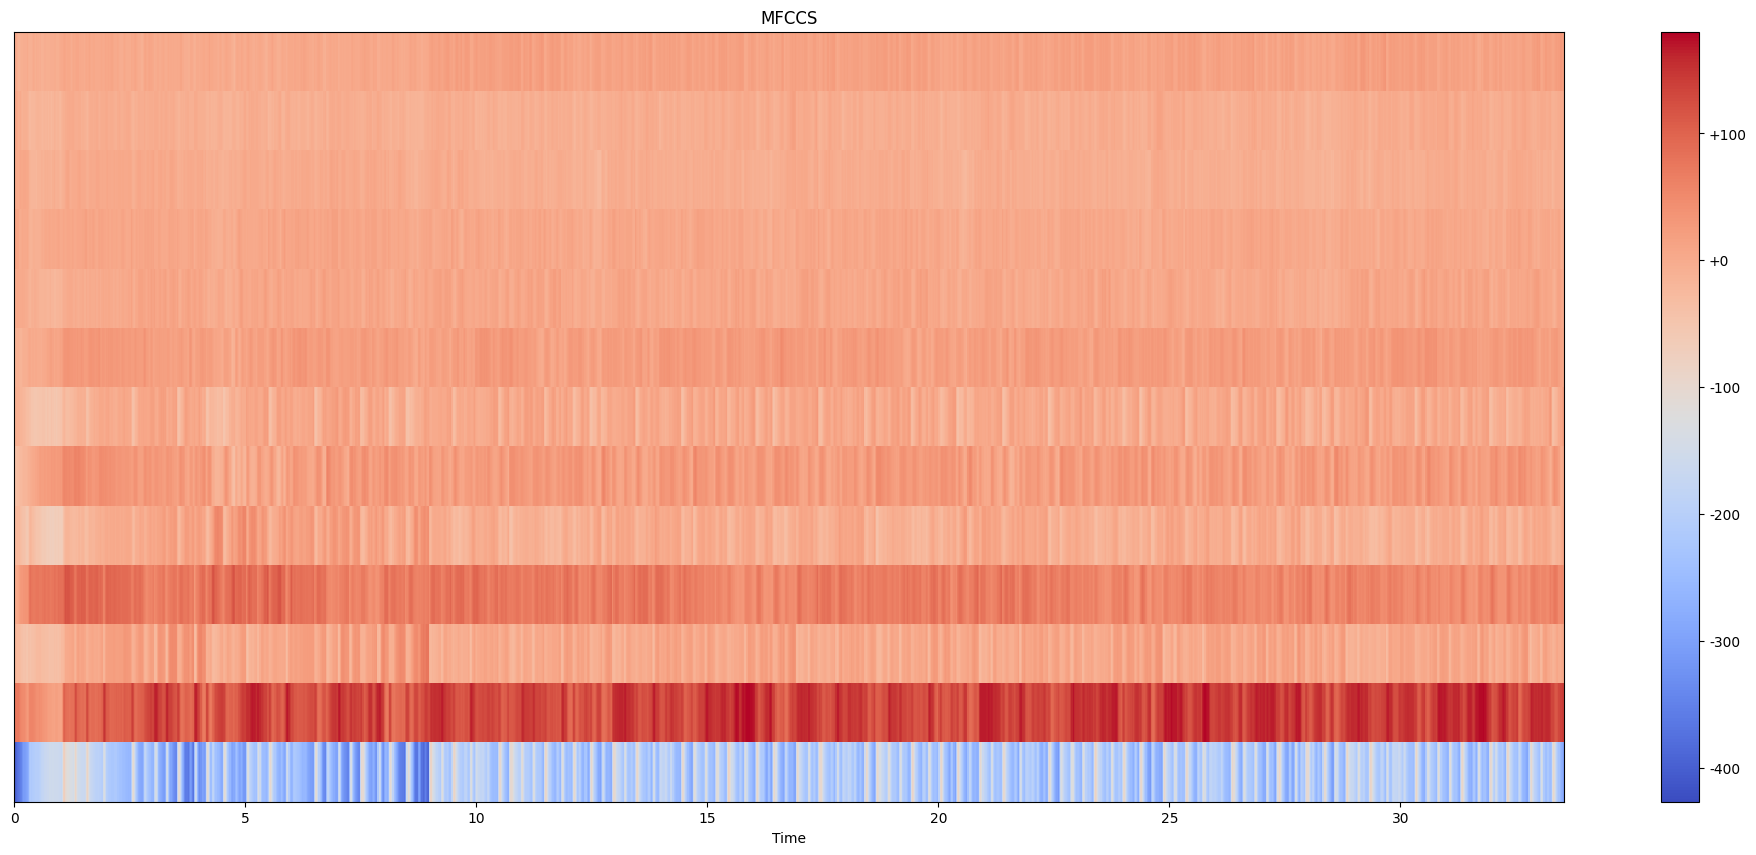

In [42]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs,
                         x_axis="time",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('MFCCS')
plt.show()

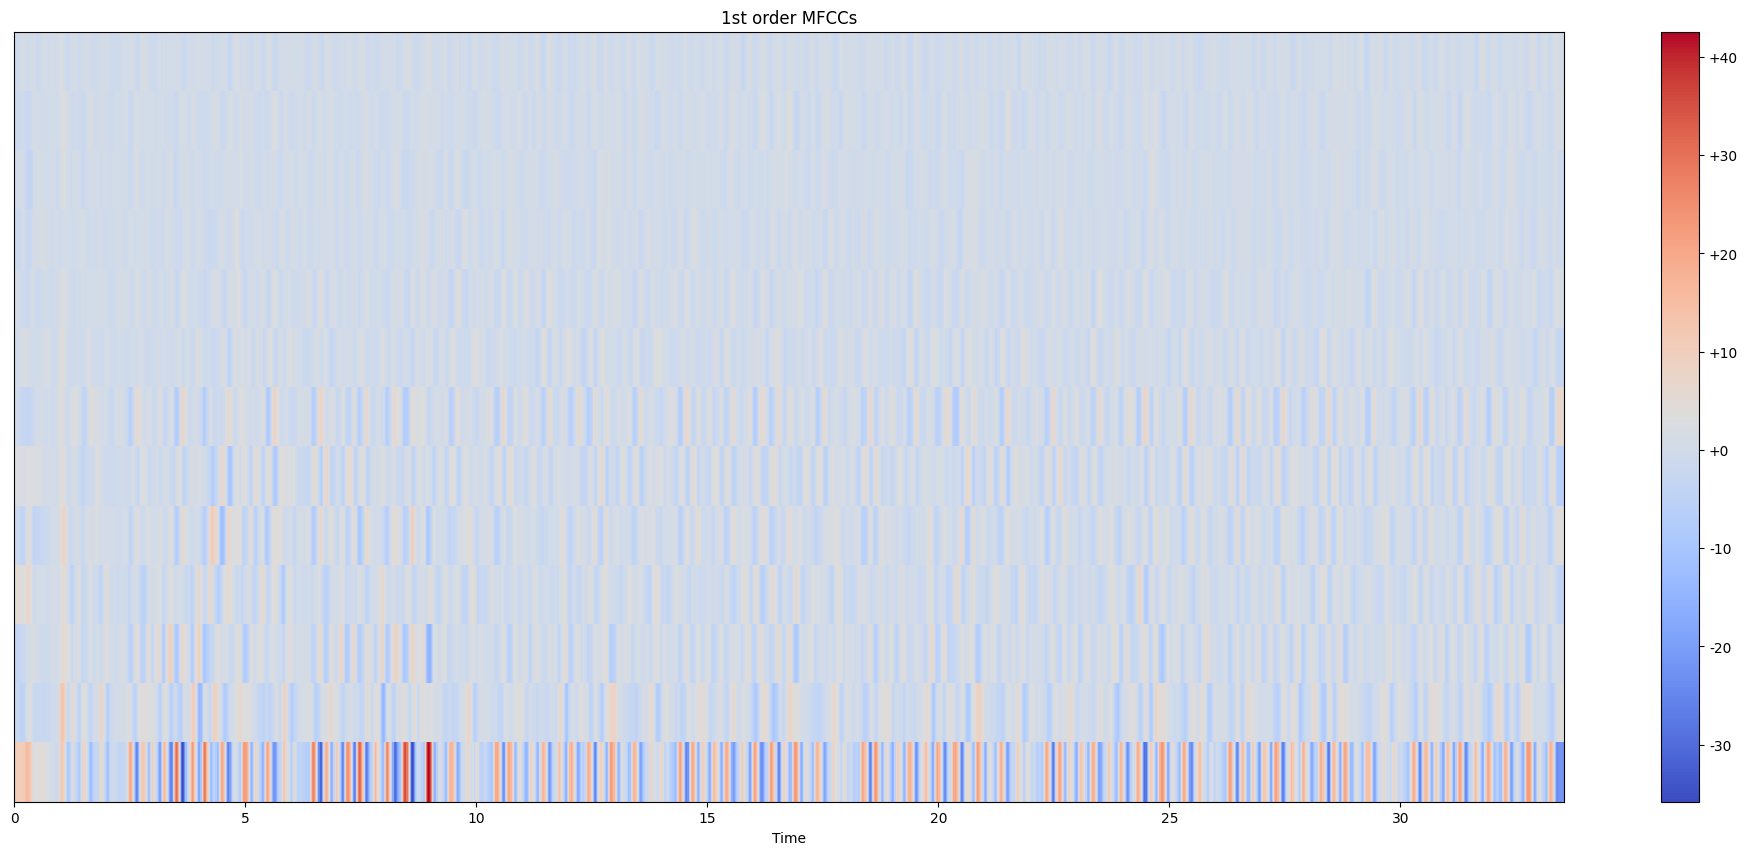

In [43]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs,
                         x_axis="time",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('1st order MFCCs')
plt.show()

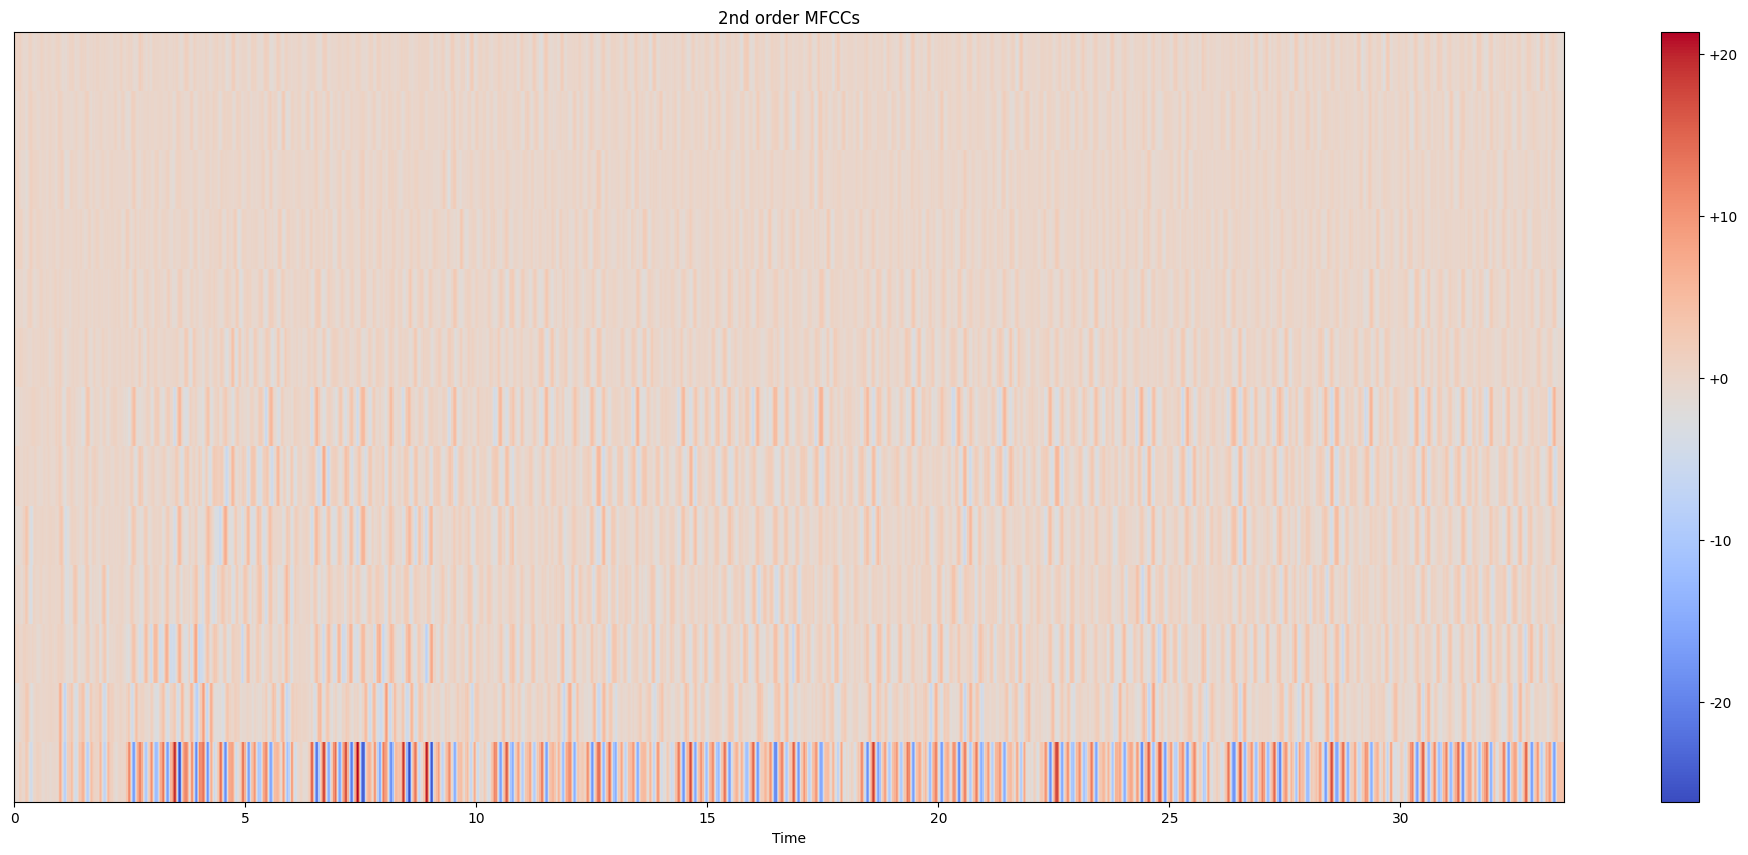

In [44]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs,
                         x_axis="time",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('2nd order MFCCs')
plt.show()